#  Simple Fitting
Create an exponential fitting
The idea is to create a set of numbers x,y with  the function x^3 and some noise from ROOT,
fit the function to get the exponent (which must be near 3) and plot the points with noise,
the known function and the fitted function




**Author:** Omar Zapata  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:38 AM.</small></i>

In [1]:
%%cpp -d
#include<TRInterface.h>
#include<TRandom.h>

In file included from input_line_26:1:
In file included from /mnt/build/workspace/root-makedoc-v618/rootspi/rdoc/src/v6-18-00-patches.build/include/TRInterface.h:15:
In file included from /mnt/build/workspace/root-makedoc-v618/rootspi/rdoc/src/v6-18-00-patches.build/include/TRObject.h:14:
/mnt/build/workspace/root-makedoc-v618/rootspi/rdoc/src/v6-18-00-patches.build/include/RExports.h:54:9: fatal error: 'RcppCommon.h' file not found
#include<RcppCommon.h>
        ^~~~~~~~~~~~~~


In [2]:
TCanvas *c1 = new TCanvas("c1","Curve Fitting",700,500);
c1->SetGrid();

Draw a frame to define the range

In [3]:
TMultiGraph *mg = new TMultiGraph();

Create the first plot (points with gaussian noise)

In [4]:
const Int_t n = 24;
Double_t x1[n] ;
Double_t y1[n] ;

input_line_34:4:10: error: redefinition of 'y1' as different kind of symbol
Double_t y1[n] ;
         ^
/usr/include/bits/mathcalls.h:221:13: note: previous definition is here
__MATHCALL (y1,, (_Mdouble_));
            ^


Generate the points along a x^3 with noise

In [5]:
TRandom rg;
rg.SetSeed(520);
for (Int_t i = 0; i < n; i++) {
   x1[i] = rg.Uniform(0, 1);
   y1[i] = TMath::Power(x1[i], 3) + rg.Gaus() * 0.06;
}

TGraph *gr1 = new TGraph(n,x1,y1);
gr1->SetMarkerColor(kBlue);
gr1->SetMarkerStyle(8);
gr1->SetMarkerSize(1);
mg->Add(gr1);

   // create the second plot
TF1 *f_known=new TF1("f_known","pow(x,3)",0,1);
TGraph *gr2 = new TGraph(f_known);
gr2->SetMarkerColor(kRed);
gr2->SetMarkerStyle(8);
gr2->SetMarkerSize(1);
mg->Add(gr2);

input_line_35:6:4: error: subscript of pointer to function type 'double (double) throw()'
   y1[i] = TMath::Power(x1[i], 3) + rg.Gaus() * 0.06;
   ^~
input_line_35:6:25: error: use of undeclared identifier 'x1'
   y1[i] = TMath::Power(x1[i], 3) + rg.Gaus() * 0.06;
                        ^
input_line_35:9:26: error: use of undeclared identifier 'n'
TGraph *gr1 = new TGraph(n,x1,y1);
                         ^
input_line_35:9:28: error: use of undeclared identifier 'x1'
TGraph *gr1 = new TGraph(n,x1,y1);
                           ^


Passing data to rfot fitting

In [6]:
ROOT::R::TRInterface &r=ROOT::R::TRInterface::Instance();
r["x"]<<TVectorD(n, x1);
r["y"]<<TVectorD(n, y1);

In file included from libRInterface dictionary payload:5:
/mnt/build/workspace/root-makedoc-v618/rootspi/rdoc/src/v6-18-00-patches.build/include/RExports.h:54:9: fatal error: 'RcppCommon.h' file not found
#include<RcppCommon.h>
        ^~~~~~~~~~~~~~
Error in <TInterpreter::AutoParse>: Error parsing payload code for class ROOT::R::TRInterface with content:

#line 1 "libRInterface dictionary payload"


#define _BACKWARD_BACKWARD_WARNING_H
// Inline headers
#include "RExports.h"
#include "TRDataFrame.h"
#include "TRFunctionExport.h"
#include "TRFunctionImport.h"
#include "TRInterface.h"
#include "TRInternalFunction.h"
#include "TRObject.h"

#undef  _BACKWARD_BACKWARD_WARNING_H

input_line_36:2:35: error: incomplete type 'ROOT::R::TRInterface' named in nested name specifier
 ROOT::R::TRInterface &r=ROOT::R::TRInterface::Instance();
                         ~~~~~~~~~^~~~~~~~~~~~~
libRInterface dictionary forward declarations' payload:9:93: note: forward declaration of 'ROOT::R::TRInterface

Creating a r data frame

In [7]:
r<<"ds<-data.frame(x=x,y=y)";

IncrementalExecutor::executeFunction: symbol '_ZN5cling7runtime8internal9EvaluateTIvEET_PNS1_15DynamicExprInfoEPN5clang11DeclContextE' unresolved while linking [cling interface function]!
You are probably missing the definition of void cling::runtime::internal::EvaluateT<void>(cling::runtime::internal::DynamicExprInfo*, clang::DeclContext*)
Maybe you need to load the corresponding shared library?


Fitting x and y to x^power using nonlinear least squares

In [8]:
r<<"m <- nls(y ~ I(x^power),data = ds, start = list(power = 1),trace = T)";

IncrementalExecutor::executeFunction: symbol '_ZN5cling7runtime8internal9EvaluateTIvEET_PNS1_15DynamicExprInfoEPN5clang11DeclContextE' unresolved while linking [cling interface function]!
You are probably missing the definition of void cling::runtime::internal::EvaluateT<void>(cling::runtime::internal::DynamicExprInfo*, clang::DeclContext*)
Maybe you need to load the corresponding shared library?


Getting the exponent

In [9]:
Double_t power;
r["summary(m)$coefficients[1]"]>>power;

TF1 *f_fitted=new TF1("f_fitted","pow(x,[0])",0,1);
f_fitted->SetParameter(0,power);

IncrementalExecutor::executeFunction: symbol '_ZN5cling7runtime8internal9EvaluateTIvEET_PNS1_15DynamicExprInfoEPN5clang11DeclContextE' unresolved while linking function '_GLOBAL__sub_I_cling_module_69'!
You are probably missing the definition of void cling::runtime::internal::EvaluateT<void>(cling::runtime::internal::DynamicExprInfo*, clang::DeclContext*)
Maybe you need to load the corresponding shared library?
 Generating stack trace...
 0x00007fd4a3f975c3 in cling::Interpreter::RunFunction(clang::FunctionDecl const*, cling::Value*) + 0x93 from /mnt/build/workspace/root-makedoc-v618/rootspi/rdoc/src/v6-18-00-patches.build/lib/libCling.so
 0x00007fd4a3f98cea in cling::Interpreter::EvaluateInternal(std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > const&, cling::CompilationOptions, cling::Value*, cling::Transaction**, unsigned long) + 0x15a from /mnt/build/workspace/root-makedoc-v618/rootspi/rdoc/src/v6-18-00-patches.build/lib/libCling.so
 0x00007fd4a3f98f6

Plotting the fitted function

In [10]:
TGraph *gr3 = new TGraph(f_fitted);
gr3->SetMarkerColor(kGreen);
gr3->SetMarkerStyle(8);
gr3->SetMarkerSize(1);

mg->Add(gr3);
mg->Draw("ap");

Error in <TGraph::TGraph>: Pointer to function is null


Displaying basic results

In [11]:
TPaveText *pt = new TPaveText(0.1,0.6,0.5,0.9,"brNDC");
pt->SetFillColor(18);
pt->SetTextAlign(12);
pt->AddText("Fitting x^power ");
pt->AddText(" \"Blue\"   Points with gaussian noise to be fitted");
pt->AddText(" \"Red\"    Known function x^3");
TString fmsg;
fmsg.Form(" \"Green\"  Fitted function with power=%.4lf",power);
pt->AddText(fmsg);
pt->Draw();
c1->Update();
return c1;

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


Draw all canvases 

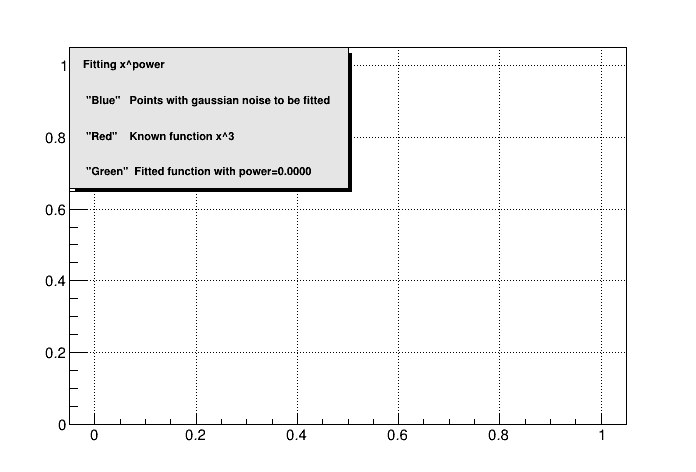

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


In [12]:
gROOT->GetListOfCanvases()->Draw()